In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('DataScience_salaries_2024.csv')

# Display the first 5 rows (default for head)
print(df.head())

   work_year experience_level employment_type                       job_title  \
0       2021               MI              FT                  Data Scientist   
1       2021               MI              FT                 BI Data Analyst   
2       2020               MI              FT                  Data Scientist   
3       2021               MI              FT                     ML Engineer   
4       2022               SE              FT  Lead Machine Learning Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  30400000             CLP          40038                 CL           100   
1  11000000             HUF          36259                 HU            50   
2  11000000             HUF          35735                 HU            50   
3   8500000             JPY          77364                 JP            50   
4   7500000             INR          95386                 IN            50   

  company_location company_size  
0   

In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


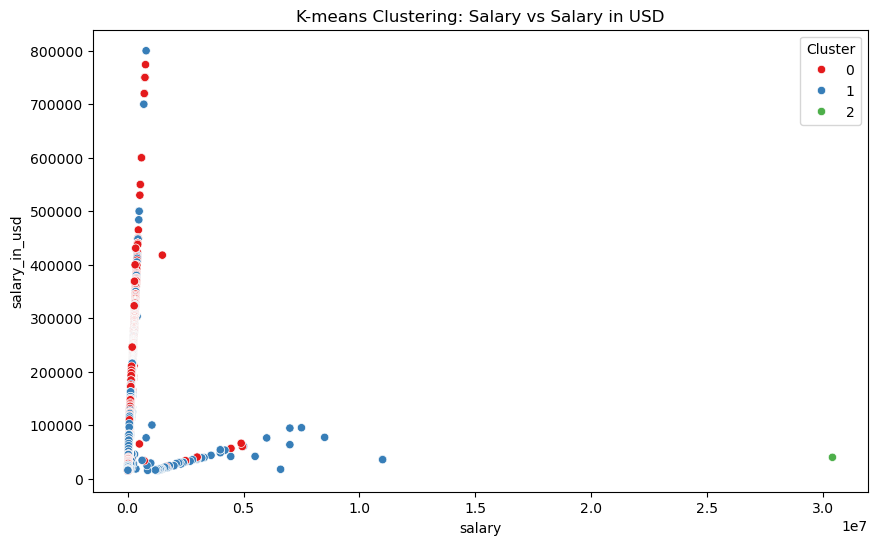

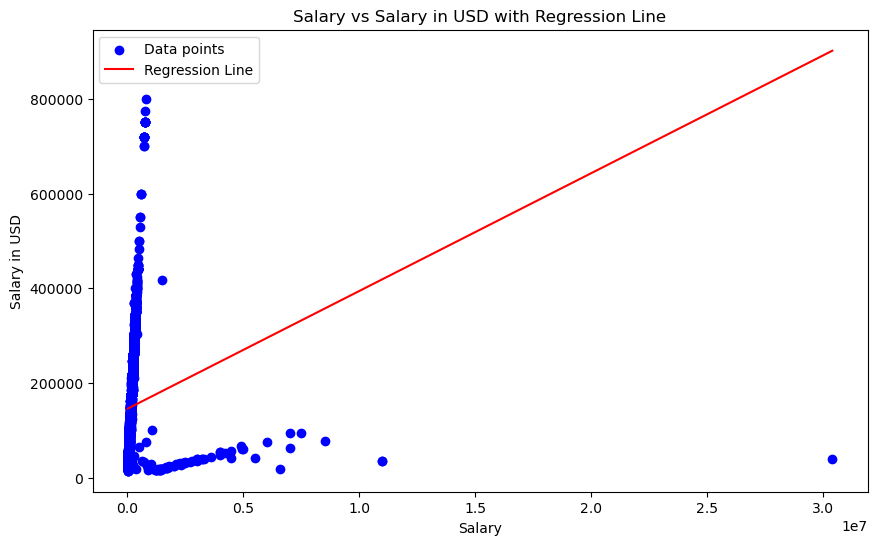

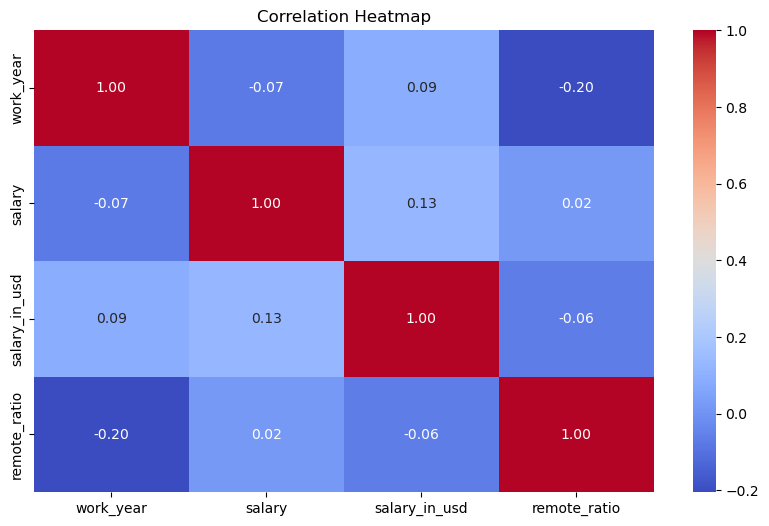

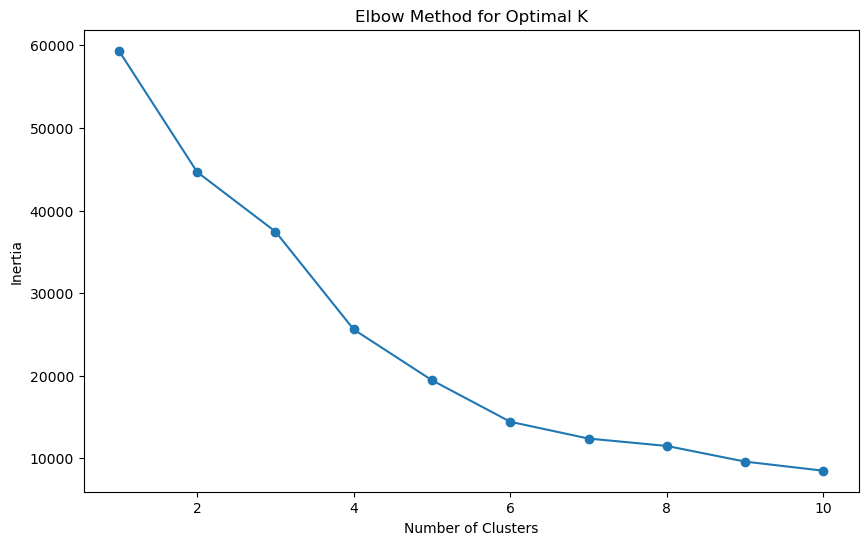

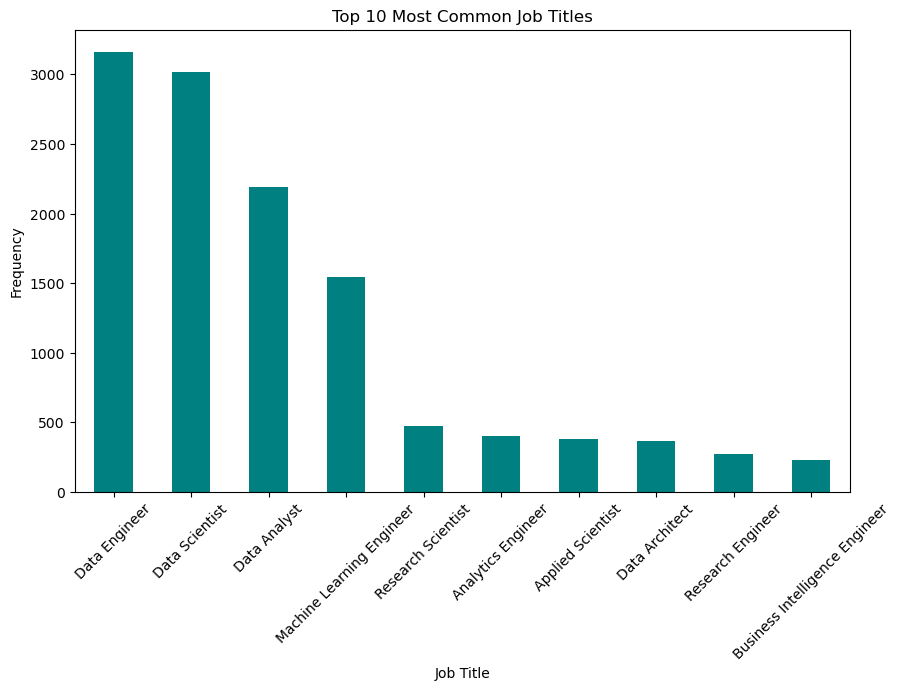

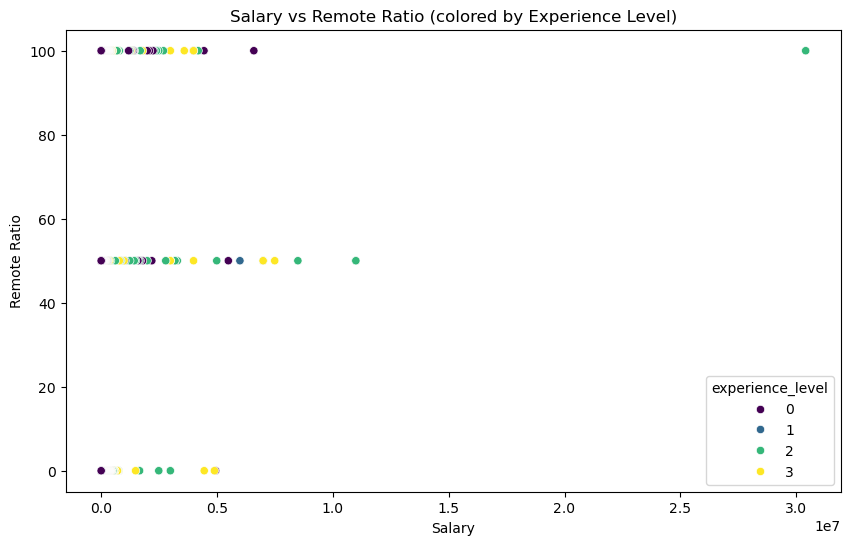

In [17]:
# Encode categorical columns
df['experience_level'] = df['experience_level'].astype('category').cat.codes
df['employment_type'] = df['employment_type'].astype('category').cat.codes
df['salary_currency'] = df['salary_currency'].astype('category').cat.codes
df['employee_residence'] = df['employee_residence'].astype('category').cat.codes
df['company_location'] = df['company_location'].astype('category').cat.codes
df['company_size'] = df['company_size'].astype('category').cat.codes

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['salary', 'salary_in_usd', 'remote_ratio', 'company_size']])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Plot K-means clustering result (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='salary', y='salary_in_usd', hue='Cluster', palette='Set1')
plt.title('K-means Clustering: Salary vs Salary in USD')
plt.show()

# Fit a linear regression model
X = df[['salary']]  # Independent variable
y = df['salary_in_usd']  # Dependent variable

model = LinearRegression()
model.fit(X, y)

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Salary vs Salary in USD with Regression Line')
plt.xlabel('Salary')
plt.ylabel('Salary in USD')
plt.legend()
plt.show()

# Exclude non-numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_cols]

# Select only numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_cols]

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Elbow method to determine the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
# Additional Bar Plot: Job Title Distribution
plt.figure(figsize=(10, 6))
df['job_title'].value_counts().nlargest(10).plot(kind='bar', color='teal')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Additional Scatter Plot: Salary vs Remote Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='salary', y='remote_ratio', hue='experience_level', palette='viridis')
plt.title('Salary vs Remote Ratio (colored by Experience Level)')
plt.xlabel('Salary')
plt.ylabel('Remote Ratio')
plt.show()
